# Decision Tree Modeling and Optimization

## In-class data points

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dmc2010_train_modified_full.csv to dmc2010_train_modified_full.csv
User uploaded file "dmc2010_train_modified_full.csv" with length 3956312 bytes


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Generate synthetic dataset
data=pd.read_csv('in-class-data.csv')
data

,Body Shape,Head Color,Class,Train
0,Square,Black,0,1
1,Circle,White,1,1
2,Square,White,0,1
3,Circle,Black,1,1
4,Square,Black,1,1
5,Circle,Black,0,1
6,Square,White,1,1
7,Circle,White,0,1
8,Square,Black,0,1
9,Square,White,1,1


In [ ]:
df_train = data[data['Train']==1]
df_test = data[data['Train']==0]
df_test

,Body Shape,Head Color,Class,Train
12,Square,Black,1,0
13,Circle,White,1,0
14,Square,Black,0,0


In [ ]:
# Replace cell values with numbers
replace_map = {
    'Body Shape': {'Square': 0, 'Circle': 1},
    'Head Color': {'Black': 0, 'White': 1}
}

df_train_replaced = df_train.replace(replace_map)
df_test_replaced = df_test.replace(replace_map)
df_test_replaced

,Body Shape,Head Color,Class,Train
12,0,0,1,0
13,1,1,1,0
14,0,0,0,0


In [ ]:
# Separate features and labels
X_train = df_train_replaced.drop(['Class','Train'], axis=1)
y_train = df_train_replaced['Class']
X_test = df_test_replaced.drop(['Class','Train'], axis=1)
y_test = df_test_replaced['Class']
print(X_test)
# print(y_test)


    Body Shape  Head Color
12           0           0
13           1           1
14           0           0


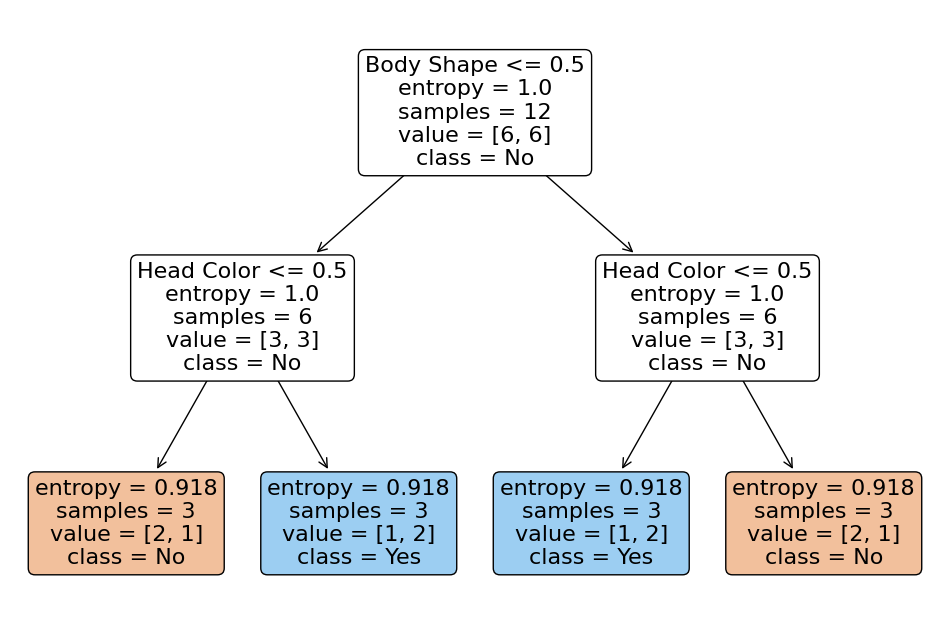

In [ ]:
# Train a decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=['No','Yes'], rounded=True)
plt.show()

In [ ]:
from sklearn import tree

text_representation = tree.export_text(clf, feature_names=['Body Shape','Head Color'], max_depth=1)
print(text_representation)

|--- Body Shape <= 0.50
|   |--- Head Color <= 0.50
|   |   |--- class: 0
|   |--- Head Color >  0.50
|   |   |--- class: 1
|--- Body Shape >  0.50
|   |--- Head Color <= 0.50
|   |   |--- class: 1
|   |--- Head Color >  0.50
|   |   |--- class: 0



## Actual data points, coupon target prediction

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

NameError: ignored

# Customer Retention Through Voucher Distribution

## Problem Statement
- Single-purchase behavior prevalent among online customers.
- Inefficient to give vouchers to all customers.

## Objective
- Identify customers likely to repurchase within 90 days.
- Exclude these customers from vouchers target.


In [2]:
import pandas as pd
file_path='dmc2010_train_modified_full.csv'
df_full = pd.read_csv(file_path)
df_full

<ipython-input-2-eeb67a132910>:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv(file_path)


,Unique_Customer_Number,Date_of_First_Order,Salutation,Title_Available,domain,Date_Account_Opened,Newsletter_Subscribed,model,Payment_Type,Delivery_Type,...,Number_of_Audio_Books_Ordered,Number_of_Audio_Books_Downloaded,Number_of_Films_Ordered,Number_of_Musical_Items_Ordered,Number_of_Hardware_Items_Ordered,Number_of_Imported_Items_Ordered,Number_of_Other_Items_Ordered,target90,Account_to_First_Purchase_Gap,Delivery_Date_Difference
0,41191,2008-12-01,0,0,9,2008-12-01,0,2,2,0,...,0,0,0,0,0,0,0,0,0,-1.0
1,38860,2008-12-16,1,0,4,2008-12-16,0,1,1,1,...,0,0,0,0,0,0,0,0,0,35.0
2,61917,2008-08-19,0,0,12,2008-08-19,0,1,0,0,...,0,0,0,0,0,1,0,0,0,-5.0
3,40647,2008-06-16,1,0,8,2008-06-16,0,1,0,0,...,0,2,0,0,0,0,0,0,0,NaN
4,1347,2008-08-08,0,0,1,2008-08-08,0,1,1,1,...,0,0,0,0,0,0,0,0,0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32423,7784,2008-10-21,1,0,8,2008-10-21,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0.0
32424,41695,2008-11-09,1,0,4,2008-11-09,0,1,3,0,...,0,1,0,0,0,0,0,1,0,NaN
32425,7612,2008-04-12,2,0,9,2008-04-12,0,3,0,0,...,0,0,0,0,0,0,0,0,0,-1.0
32426,31941,2008-11-15,0,0,12,2008-11-15,0,1,0,0,...,0,0,0,0,0,0,0,0,0,-1.0


In [4]:
df_full.describe(include='all')

,Unique_Customer_Number,Date_of_First_Order,Salutation,Title_Available,domain,Date_Account_Opened,Newsletter_Subscribed,model,Payment_Type,Delivery_Type,...,Number_of_Audio_Books_Ordered,Number_of_Audio_Books_Downloaded,Number_of_Films_Ordered,Number_of_Musical_Items_Ordered,Number_of_Hardware_Items_Ordered,Number_of_Imported_Items_Ordered,Number_of_Other_Items_Ordered,target90,Account_to_First_Purchase_Gap,Delivery_Date_Difference
count,32428.000000,32428,32428.000000,32428.000000,32428.000000,32428,32428.000000,32428.000000,32428.000000,32428.000000,...,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,26950.000000
unique,NaN,351,NaN,NaN,NaN,275,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2008-12-15,NaN,NaN,NaN,2008-12-15,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,318,NaN,NaN,NaN,315,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,33389.298569,NaN,0.541569,0.006969,7.517115,NaN,0.169483,1.646910,1.000987,0.201955,...,0.047027,0.180986,0.027908,0.023128,0.000185,0.164981,0.092883,0.186598,1.726348,-17.271985
std,19148.090449,NaN,0.657044,0.083192,3.683945,NaN,0.375184,0.825981,1.092677,0.401465,...,0.434265,0.561751,0.299862,0.401782,0.013601,0.836705,0.610509,0.389594,15.936170,72.328105
min,1.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-369.000000
25%,16802.750000,NaN,0.000000,0.000000,4.000000,NaN,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000
50%,33552.500000,NaN,0.000000,0.000000,9.000000,NaN,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
75%,50034.250000,NaN,1.000000,0.000000,11.000000,NaN,0.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000


In [6]:
(6087+143+1354+53)*0.2


1527.4

## Feature Engineering

In [ ]:
# Convert the 'Date_of_First_Order' and 'Date_Account_Opened' columns to datetime format
df_full['Date_of_First_Order'] = pd.to_datetime(df_full['Date_of_First_Order'], errors='coerce')
df_full['Date_Account_Opened'] = pd.to_datetime(df_full['Date_Account_Opened'], errors='coerce')

# Calculate the gap between account opening and first purchase
df_full['Account_to_First_Purchase_Gap'] = (df_full['Date_of_First_Order'] - df_full['Date_Account_Opened']).dt.days
df_full


,Unique_Customer_Number,Date_of_First_Order,Salutation,Title_Available,domain,Date_Account_Opened,Newsletter_Subscribed,model,Payment_Type,Delivery_Type,...,Number_of_Audio_Books_Ordered,Number_of_Audio_Books_Downloaded,Number_of_Films_Ordered,Number_of_Musical_Items_Ordered,Number_of_Hardware_Items_Ordered,Number_of_Imported_Items_Ordered,Number_of_Other_Items_Ordered,target90,Account_to_First_Purchase_Gap,Delivery_Date_Difference
0,41191,2008-12-01,0,0,9,2008-12-01,0,2,2,0,...,0,0,0,0,0,0,0,0,0,-1.0
1,38860,2008-12-16,1,0,4,2008-12-16,0,1,1,1,...,0,0,0,0,0,0,0,0,0,35.0
2,61917,2008-08-19,0,0,12,2008-08-19,0,1,0,0,...,0,0,0,0,0,1,0,0,0,-5.0
3,40647,2008-06-16,1,0,8,2008-06-16,0,1,0,0,...,0,2,0,0,0,0,0,0,0,NaN
4,1347,2008-08-08,0,0,1,2008-08-08,0,1,1,1,...,0,0,0,0,0,0,0,0,0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32423,7784,2008-10-21,1,0,8,2008-10-21,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0.0
32424,41695,2008-11-09,1,0,4,2008-11-09,0,1,3,0,...,0,1,0,0,0,0,0,1,0,NaN
32425,7612,2008-04-12,2,0,9,2008-04-12,0,3,0,0,...,0,0,0,0,0,0,0,0,0,-1.0
32426,31941,2008-11-15,0,0,12,2008-11-15,0,1,0,0,...,0,0,0,0,0,0,0,0,0,-1.0


In [ ]:
df_full.describe()

,Unique_Customer_Number,Salutation,Title_Available,domain,Newsletter_Subscribed,model,Payment_Type,Delivery_Type,invoicepostcode,Voucher_Redeemed,...,Number_of_Audio_Books_Ordered,Number_of_Audio_Books_Downloaded,Number_of_Films_Ordered,Number_of_Musical_Items_Ordered,Number_of_Hardware_Items_Ordered,Number_of_Imported_Items_Ordered,Number_of_Other_Items_Ordered,target90,Account_to_First_Purchase_Gap,Delivery_Date_Difference
count,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,...,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,26950.000000
mean,33389.298569,0.541569,0.006969,7.517115,0.169483,1.646910,1.000987,0.201955,48.752282,0.162020,...,0.047027,0.180986,0.027908,0.023128,0.000185,0.164981,0.092883,0.186598,1.726348,-17.271985
std,19148.090449,0.657044,0.083192,3.683945,0.375184,0.825981,1.092677,0.401465,24.361425,0.368475,...,0.434265,0.561751,0.299862,0.401782,0.013601,0.836705,0.610509,0.389594,15.936170,72.328105
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-369.000000
25%,16802.750000,0.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,30.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000
50%,33552.500000,0.000000,0.000000,9.000000,0.000000,1.000000,1.000000,0.000000,47.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
75%,50034.250000,1.000000,0.000000,11.000000,0.000000,2.000000,2.000000,0.000000,66.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
max,66251.000000,2.000000,1.000000,12.000000,1.000000,3.000000,3.000000,1.000000,99.000000,1.000000,...,36.000000,14.000000,27.000000,55.000000,1.000000,48.000000,50.000000,1.000000,355.000000,368.000000


In [ ]:
# Convert the 'deliverydatepromised' and 'deliverydatereal' columns to datetime format
df_full['deliverydatepromised'] = pd.to_datetime(df_full['deliverydatepromised'], errors='coerce')
df_full['deliverydatereal'] = pd.to_datetime(df_full['deliverydatereal'], errors='coerce')

# Calculate the difference between promised and actual delivery dates
df_full['Delivery_Date_Difference'] = (df_full['deliverydatereal'] - df_full['deliverydatepromised']).dt.days
df_full[['deliverydatepromised','deliverydatereal','Delivery_Date_Difference']]

,deliverydatepromised,deliverydatereal,Delivery_Date_Difference
0,2008-12-03,2008-12-02,-1.0
1,2008-12-30,2009-02-03,35.0
2,2008-09-02,2008-08-28,-5.0
3,2008-06-17,NaT,NaN
4,2008-08-11,2008-08-08,-3.0
...,...,...,...
32423,2008-10-22,2008-10-22,0.0
32424,2008-11-11,NaT,NaN
32425,2008-04-15,2008-04-14,-1.0
32426,2008-11-18,2008-11-17,-1.0


## Initial Data Exploration

### Data Exploration: Histograms

Histograms for the specified variables have been generated to explore their distributions:

1. **Categorical Variables**: Variables like `Salutation`, `Newsletter_Subscribed`, `Payment_Type`, and `Delivery_Type` display discrete distributions, often binary or multinomial.
   
2. **Continuous and Ordinal Variables**: Variables such as `Value_of_Goods`, `Number_of_Ordered_Items`, and `Shipment_Weight` reveal right-skewed distributions, indicating a predominance of lower values.

3. **Special Cases**: Variables like `Number_of_Remitted_Items` and `Number_of_Cancelled_Items` show that the majority of the values are clustered around zero, suggesting that these events are relatively rare.


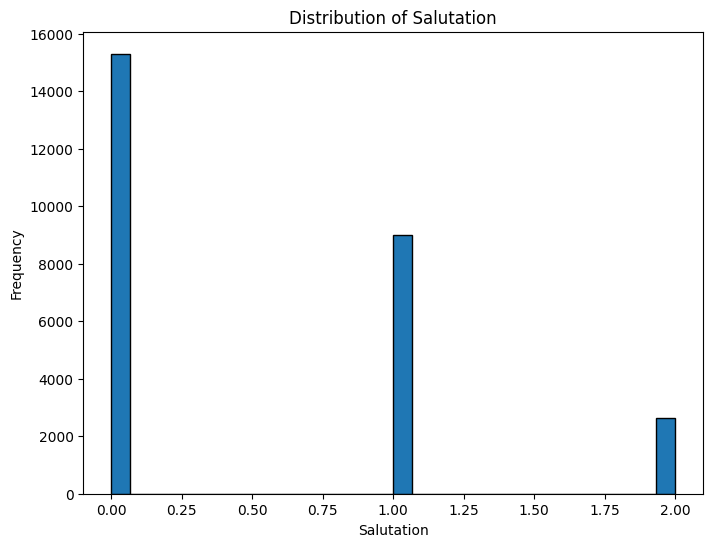

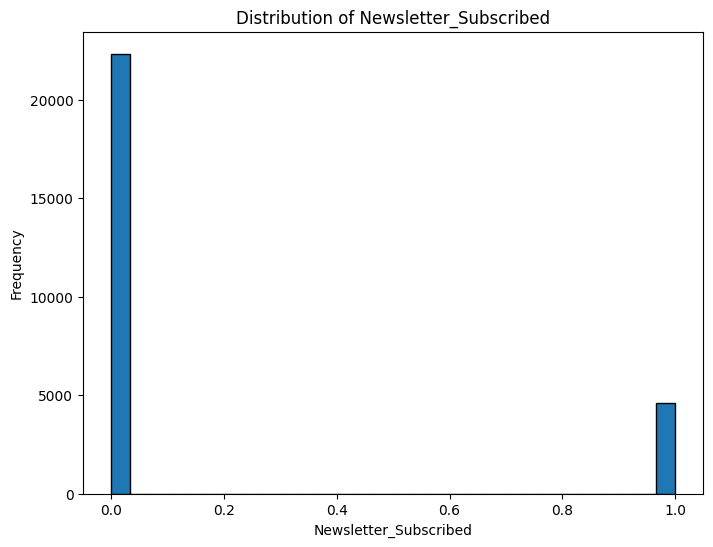

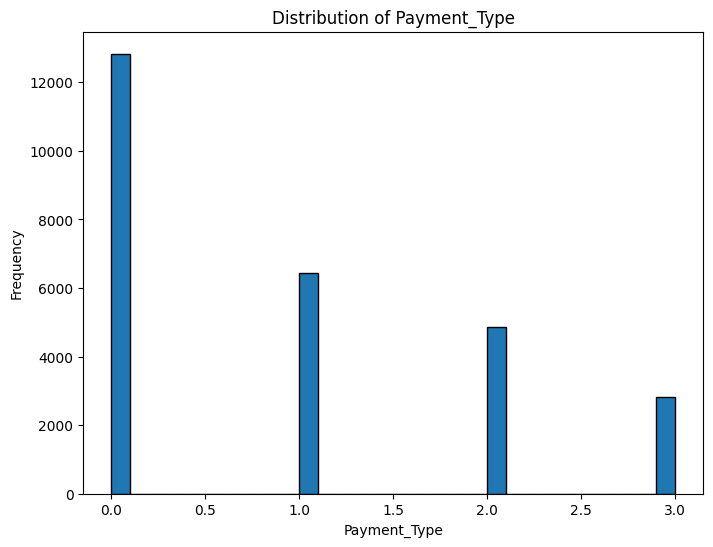

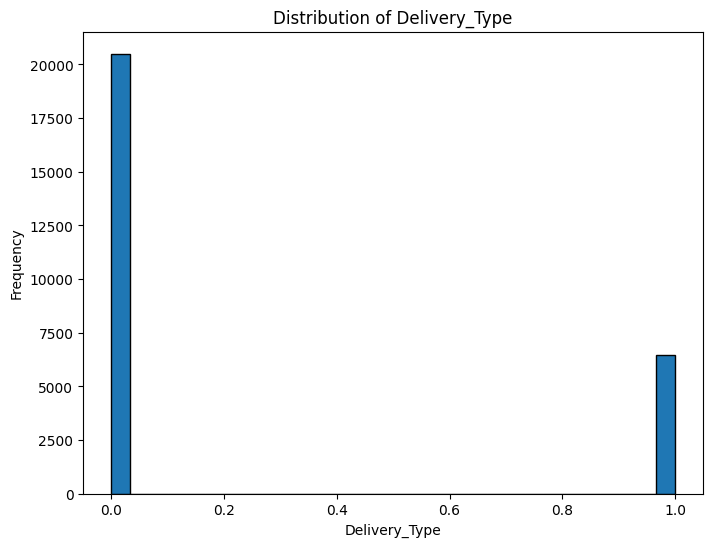

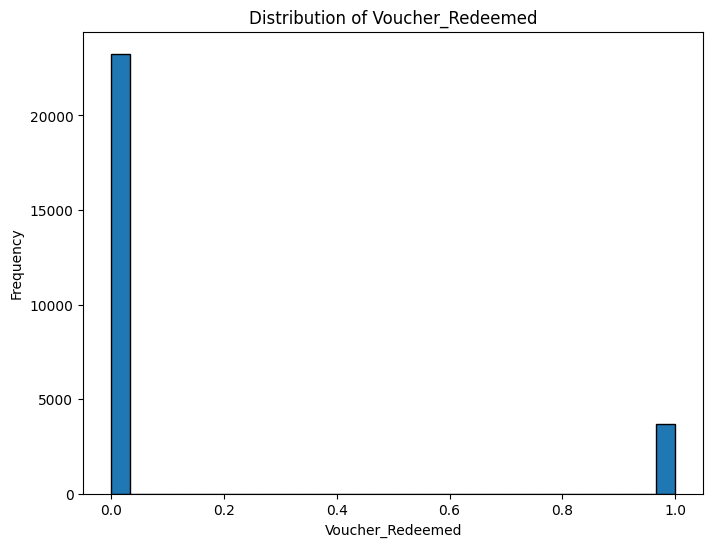

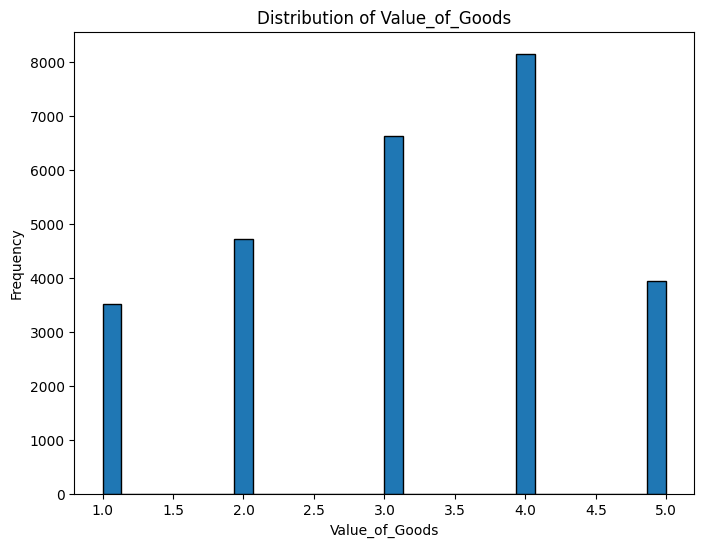

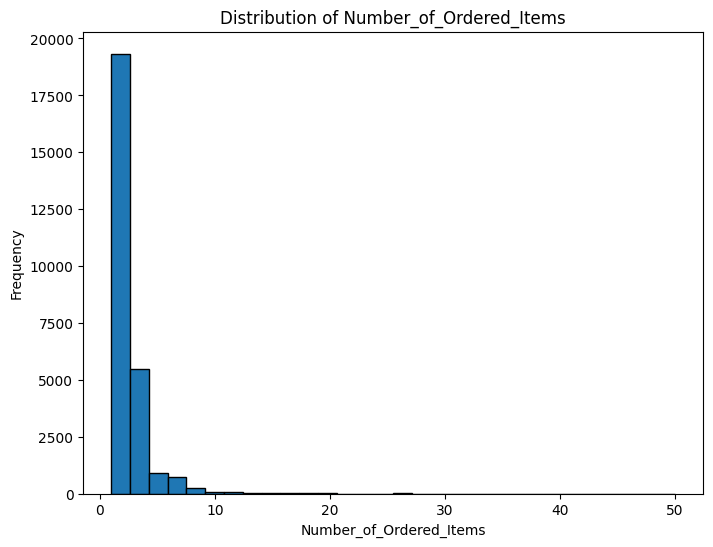

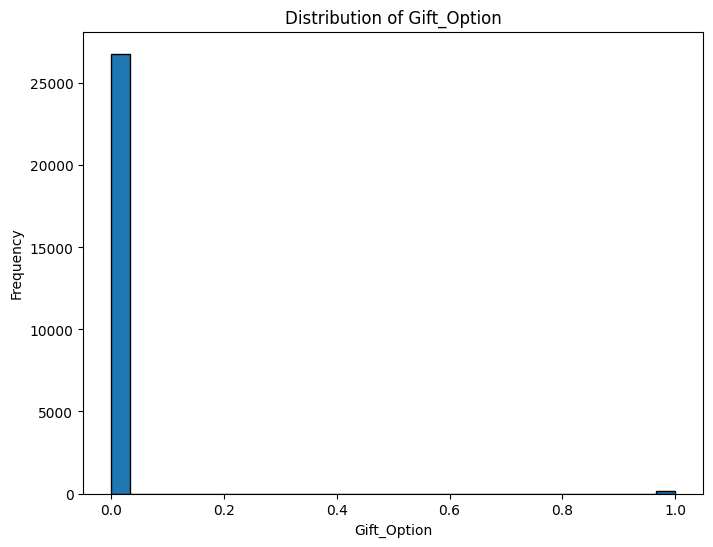

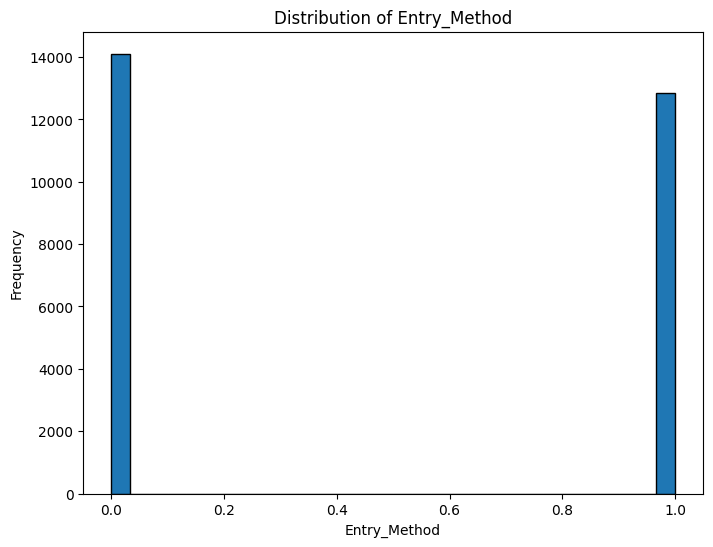

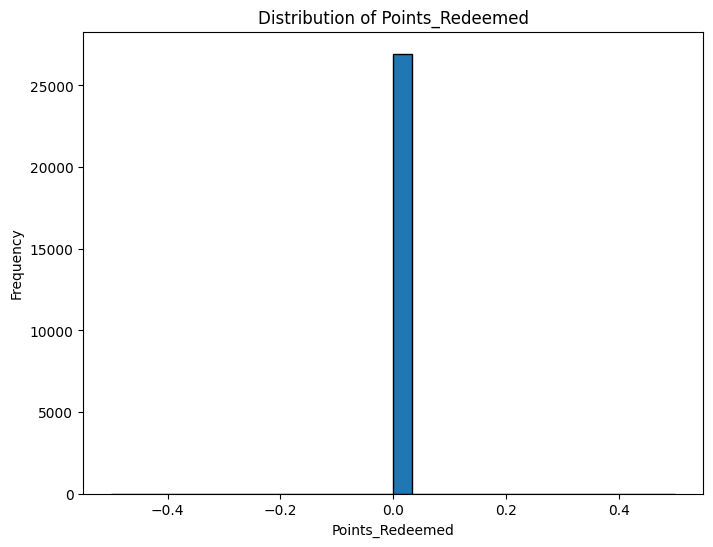

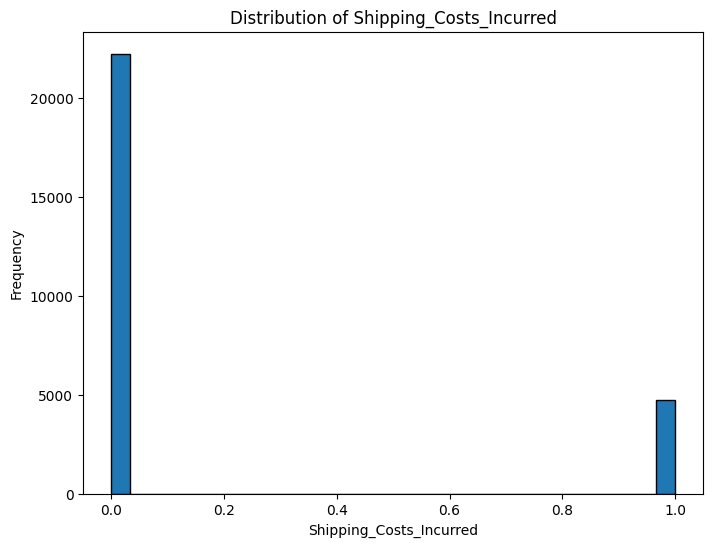

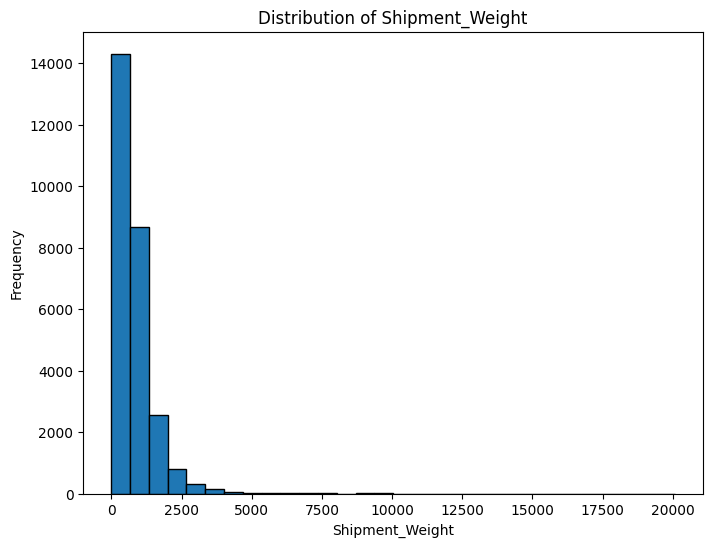

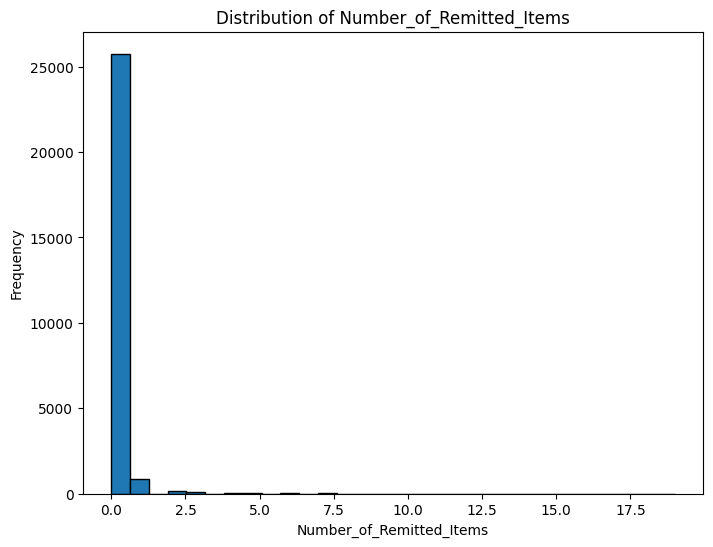

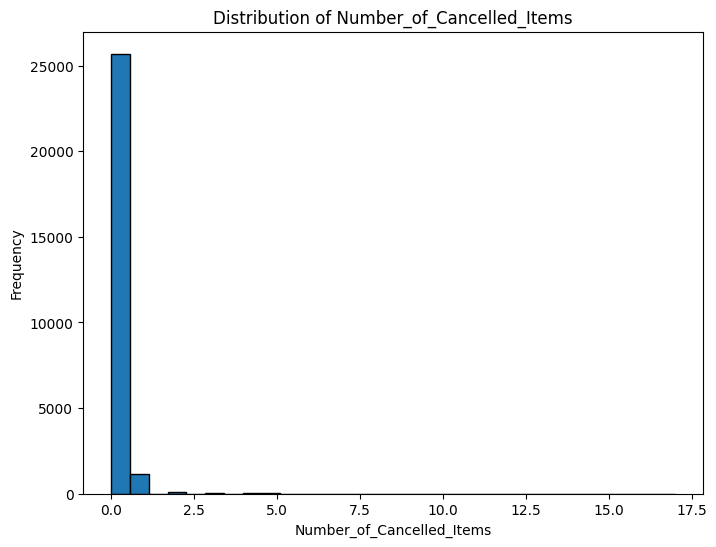

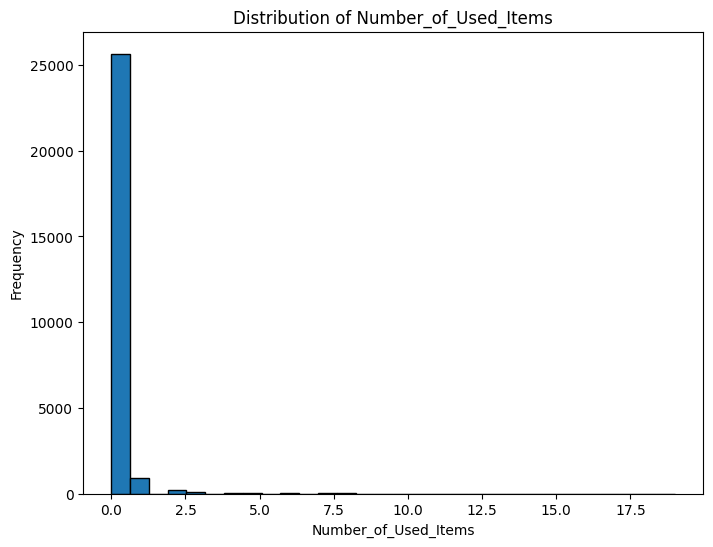

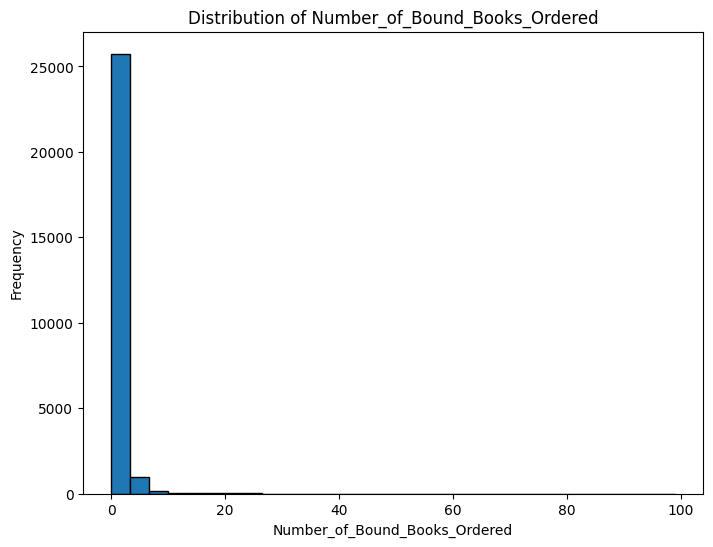

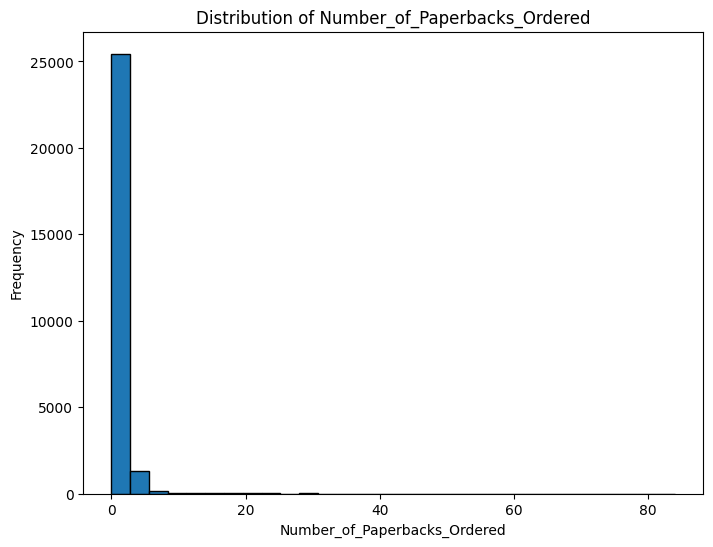

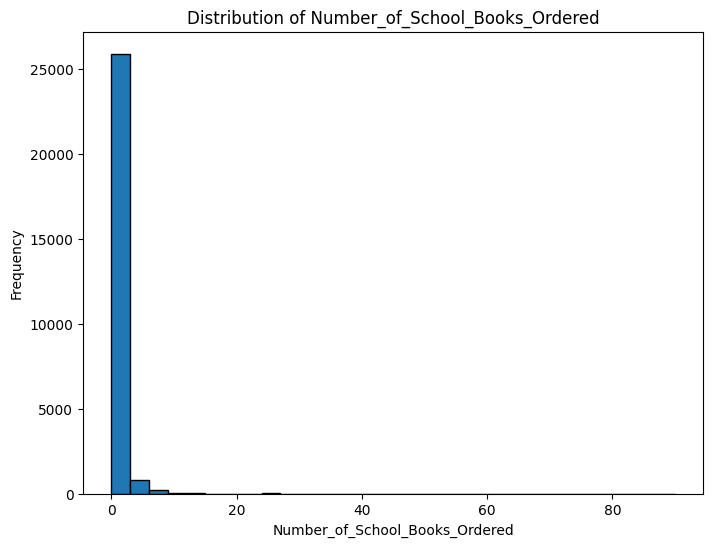

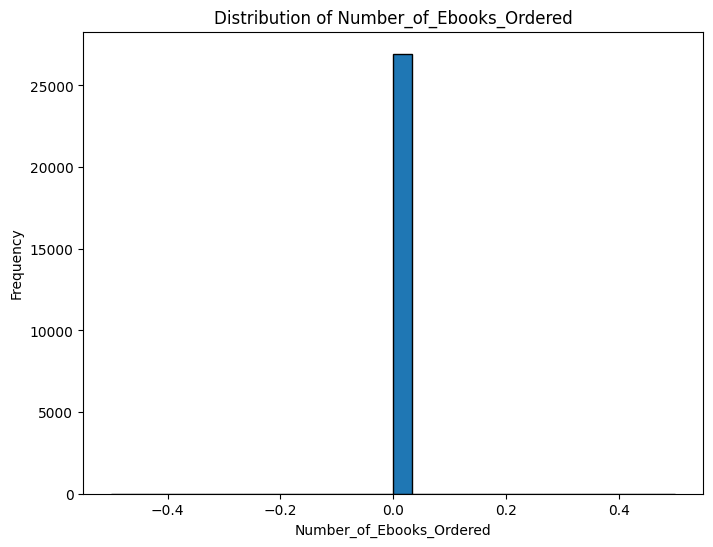

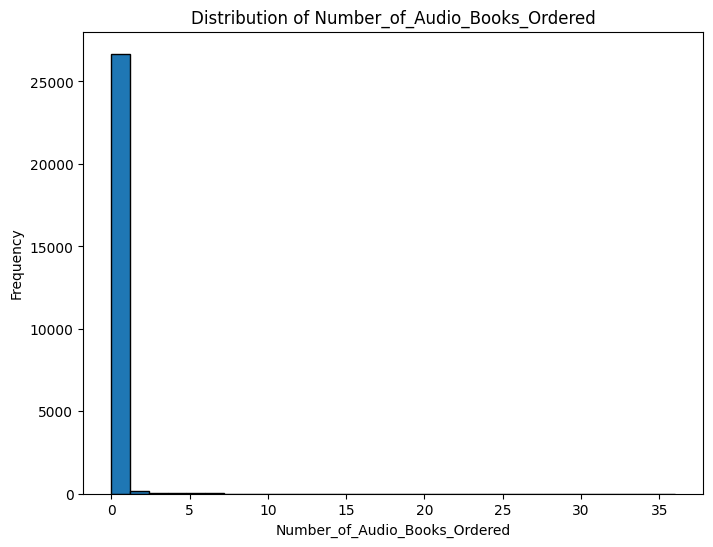

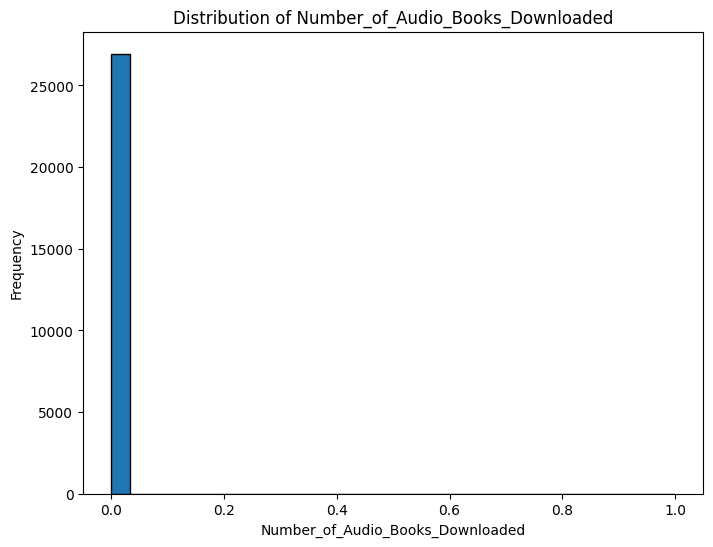

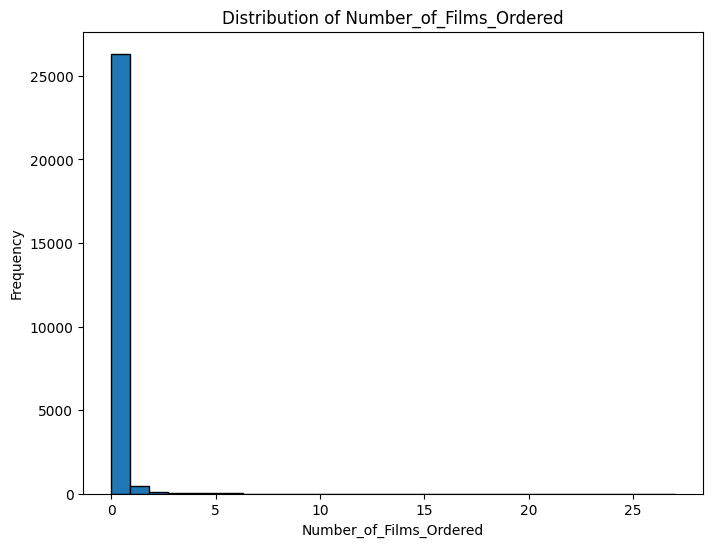

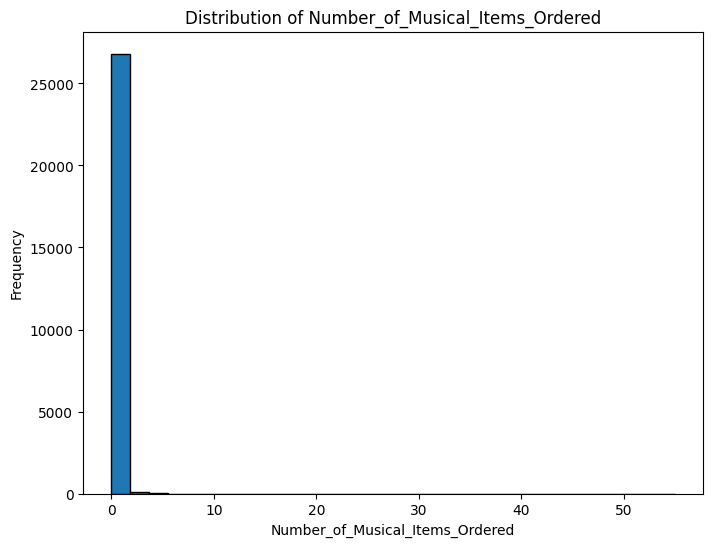

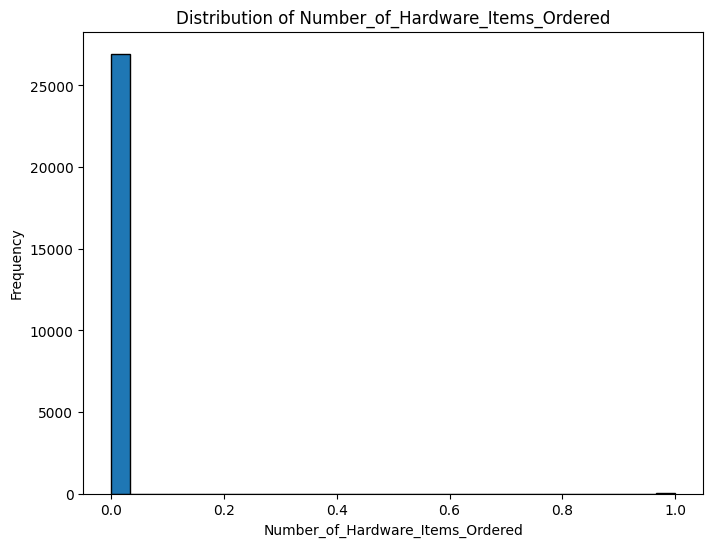

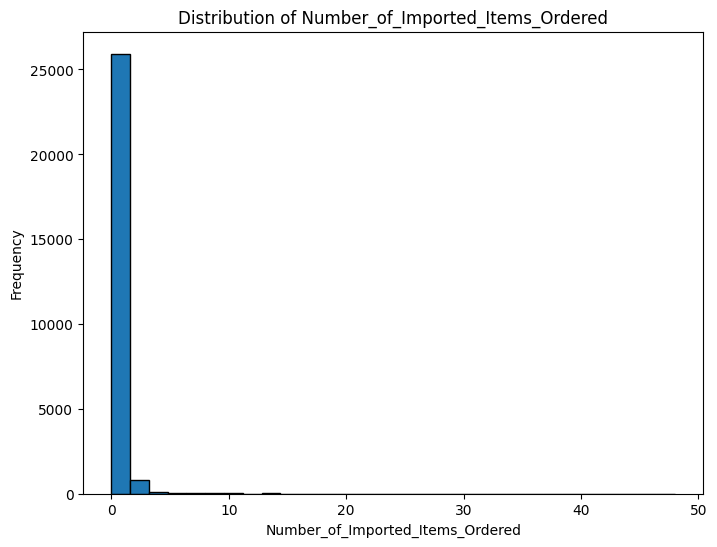

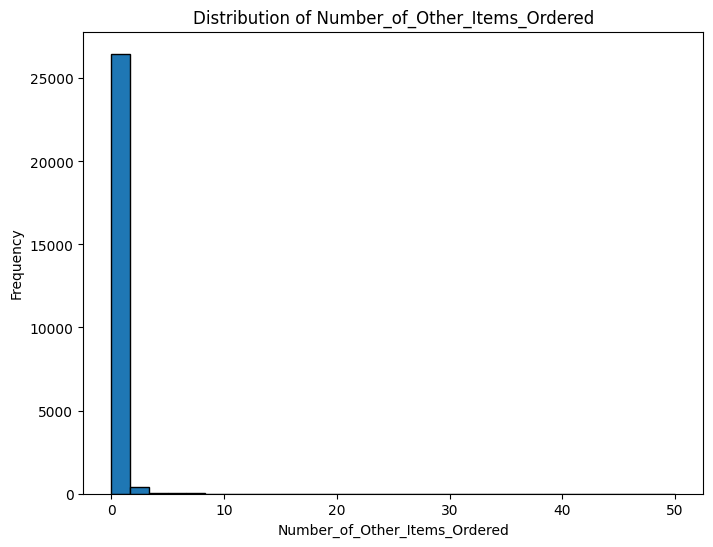

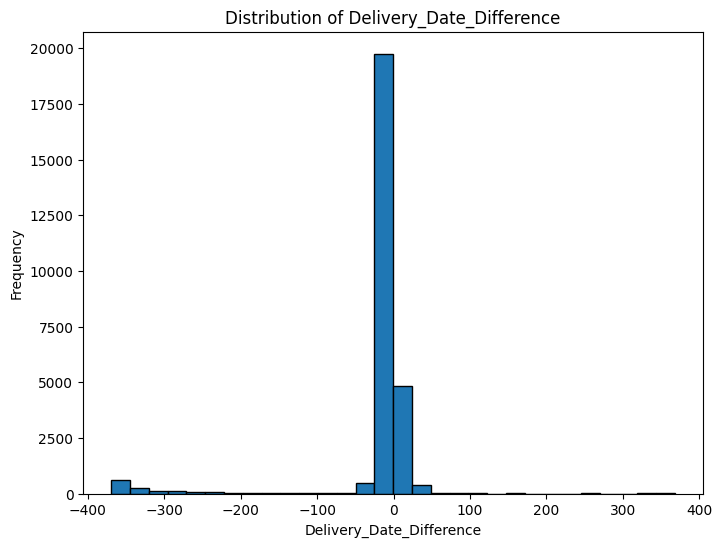

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Code for initial data loading and exploration
# Generate histograms for the specified columns
specified_columns_for_histogram = [
    'Salutation', 'Newsletter_Subscribed', 'Payment_Type', 'Delivery_Type',
    'Voucher_Redeemed', 'Value_of_Goods', 'Number_of_Ordered_Items', 'Gift_Option',
    'Entry_Method', 'Points_Redeemed', 'Shipping_Costs_Incurred', 'Shipment_Weight',
    'Number_of_Remitted_Items', 'Number_of_Cancelled_Items', 'Number_of_Used_Items',
    'Number_of_Bound_Books_Ordered', 'Number_of_Paperbacks_Ordered',
    'Number_of_School_Books_Ordered', 'Number_of_Ebooks_Ordered',
    'Number_of_Audio_Books_Ordered', 'Number_of_Audio_Books_Downloaded',
    'Number_of_Films_Ordered', 'Number_of_Musical_Items_Ordered',
    'Number_of_Hardware_Items_Ordered', 'Number_of_Imported_Items_Ordered',
    'Number_of_Other_Items_Ordered', 'Delivery_Date_Difference'
]
df_model_specified = df_full[specified_columns_for_histogram + ['target90']].dropna()

# Plot histograms for each specified column
for col in specified_columns_for_histogram:
    plt.figure(figsize=(8, 6))
    plt.hist(df_model_specified[col], bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
df_full = df_full[(df_full['Delivery_Date_Difference']>=-50)
                    & (df_full['Delivery_Date_Difference']<=50)]

### Data Exploration: Correlation Plot

The heatmap displays the correlation coefficients between the target variable `target90` and the specified variables in the dataset. The color scheme ranges from blue (indicative of a negative correlation) to red (indicative of a positive correlation). Each cell is annotated with the correlation coefficient, rounded to two decimal places.

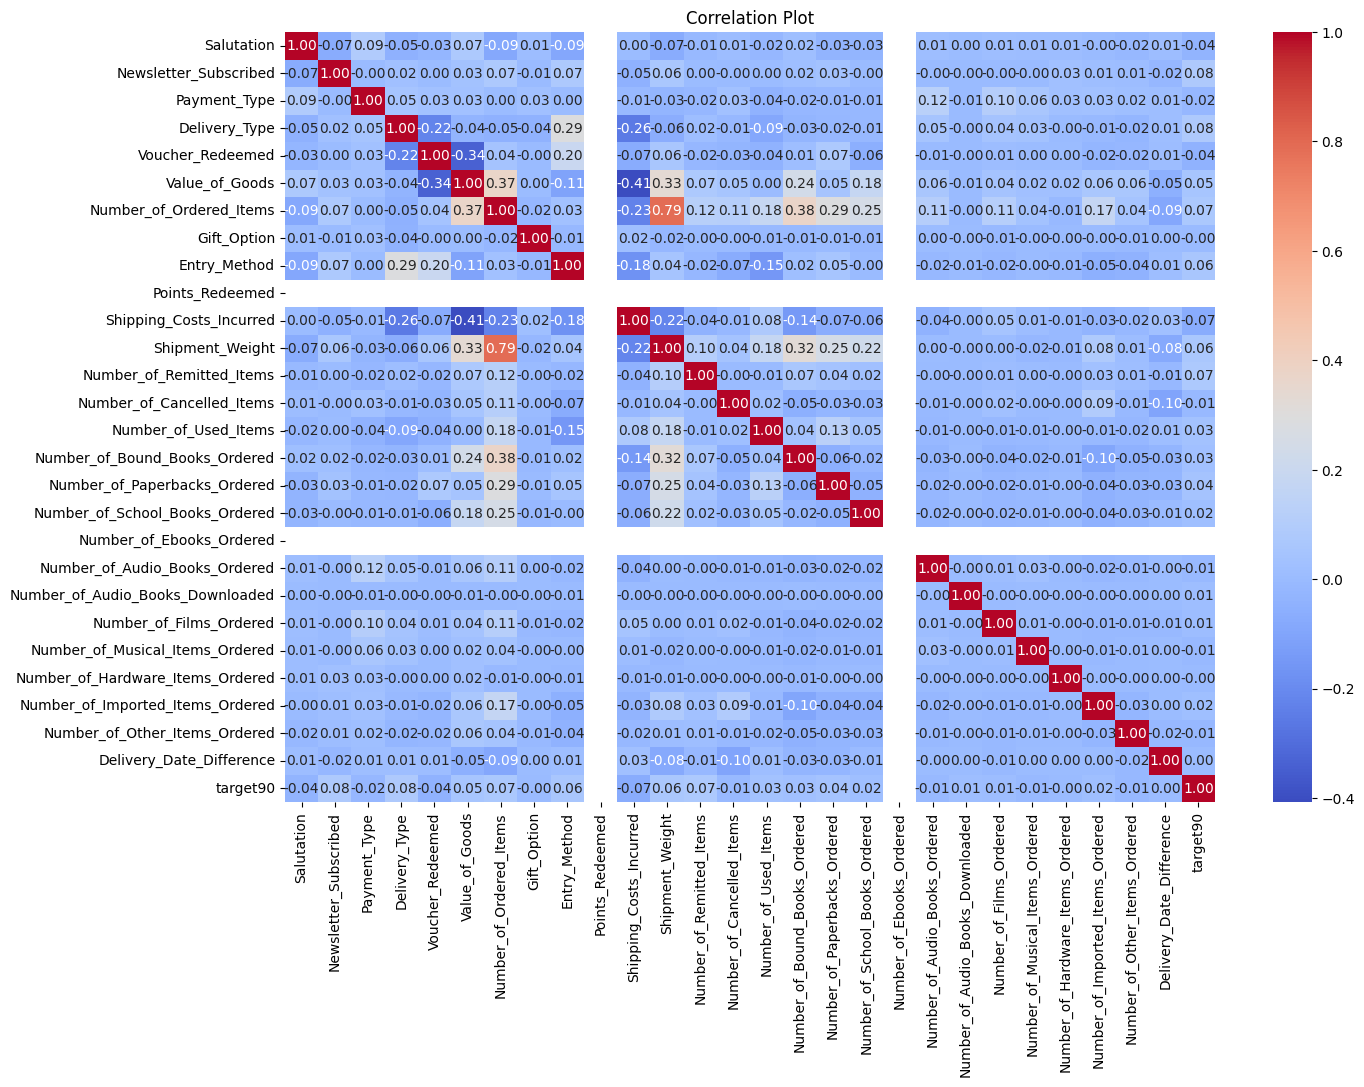

In [ ]:
# Generate a correlation matrix with the target variable 'target90'
correlation_matrix_with_target = df_model_specified[specified_columns_for_histogram + ['target90']].corr()

# Plot the correlation heatmap focused on correlation with 'target90'
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_with_target, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()


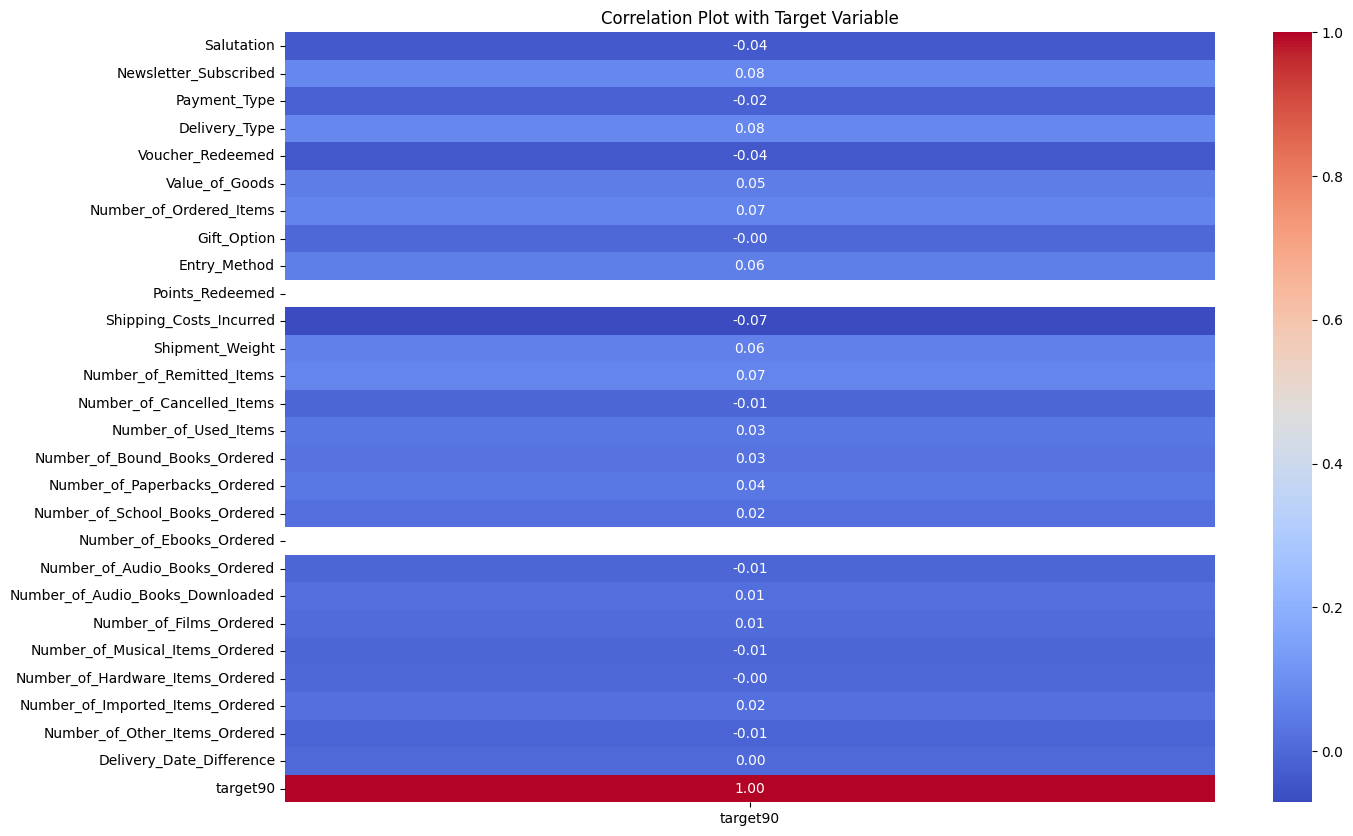

In [ ]:
# Generate a correlation matrix with the target variable 'target90'
correlation_matrix_with_target = df_model_specified[specified_columns_for_histogram + ['target90']].corr()

# Plot the correlation heatmap focused on correlation with 'target90'
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_with_target[['target90']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot with Target Variable')
plt.show()


## Model 1: Decision Tree with All Specified Variables

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Select the specified columns for the tree model
specified_columns = [
    'Salutation', 'Newsletter_Subscribed', 'Payment_Type', 'Delivery_Type',
    'Voucher_Redeemed', 'Value_of_Goods', 'Number_of_Ordered_Items', 'Gift_Option',
    'Entry_Method', 'Points_Redeemed', 'Shipping_Costs_Incurred', 'Shipment_Weight',
    'Number_of_Remitted_Items', 'Number_of_Cancelled_Items', 'Number_of_Used_Items',
    'Number_of_Bound_Books_Ordered', 'Number_of_Paperbacks_Ordered',
    'Number_of_School_Books_Ordered', 'Number_of_Ebooks_Ordered',
    'Number_of_Audio_Books_Ordered', 'Number_of_Audio_Books_Downloaded',
    'Number_of_Films_Ordered', 'Number_of_Musical_Items_Ordered',
    'Number_of_Hardware_Items_Ordered', 'Number_of_Imported_Items_Ordered',
    'Number_of_Other_Items_Ordered', 'Delivery_Date_Difference'
]
specified_columns

['Salutation',
 'Newsletter_Subscribed',
 'Payment_Type',
 'Delivery_Type',
 'Voucher_Redeemed',
 'Value_of_Goods',
 'Number_of_Ordered_Items',
 'Gift_Option',
 'Entry_Method',
 'Points_Redeemed',
 'Shipping_Costs_Incurred',
 'Shipment_Weight',
 'Number_of_Remitted_Items',
 'Number_of_Cancelled_Items',
 'Number_of_Used_Items',
 'Number_of_Bound_Books_Ordered',
 'Number_of_Paperbacks_Ordered',
 'Number_of_School_Books_Ordered',
 'Number_of_Ebooks_Ordered',
 'Number_of_Audio_Books_Ordered',
 'Number_of_Audio_Books_Downloaded',
 'Number_of_Films_Ordered',
 'Number_of_Musical_Items_Ordered',
 'Number_of_Hardware_Items_Ordered',
 'Number_of_Imported_Items_Ordered',
 'Number_of_Other_Items_Ordered',
 'Delivery_Date_Difference']

In [ ]:
len(df_full)

25454

In [ ]:
# Drop rows where the target variable or any of the specified columns have missing values
df_model_specified = df_full[specified_columns + ['target90']].dropna()
len(df_model_specified)

25454

In [ ]:
# Separate features and target variable
X_specified = df_model_specified[specified_columns]
X_specified.head()

,Salutation,Newsletter_Subscribed,Payment_Type,Delivery_Type,Voucher_Redeemed,Value_of_Goods,Number_of_Ordered_Items,Gift_Option,Entry_Method,Points_Redeemed,...,Number_of_School_Books_Ordered,Number_of_Ebooks_Ordered,Number_of_Audio_Books_Ordered,Number_of_Audio_Books_Downloaded,Number_of_Films_Ordered,Number_of_Musical_Items_Ordered,Number_of_Hardware_Items_Ordered,Number_of_Imported_Items_Ordered,Number_of_Other_Items_Ordered,Delivery_Date_Difference
0,0,0,2,0,1,2,2,0,1,0,...,0,0,0,0,0,0,0,0,0,-1.0
1,1,0,1,1,0,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,35.0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,-5.0
4,0,0,1,1,0,4,2,0,0,0,...,2,0,0,0,0,0,0,0,0,-3.0
5,0,0,0,0,0,3,3,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.0


In [ ]:
y_specified = df_model_specified['target90']
y_specified.head()

0    0
1    0
2    0
4    0
5    0
Name: target90, dtype: int64

In [ ]:
# Split the data into training and test sets
X_train_specified, X_test_specified, y_train_specified, y_test_specified = train_test_split(
    X_specified, y_specified, test_size=0.2, random_state=42
)

# Print the shapes of the training and test sets
print(X_train_specified.shape)
print(X_test_specified.shape)

(20363, 27)
(5091, 27)


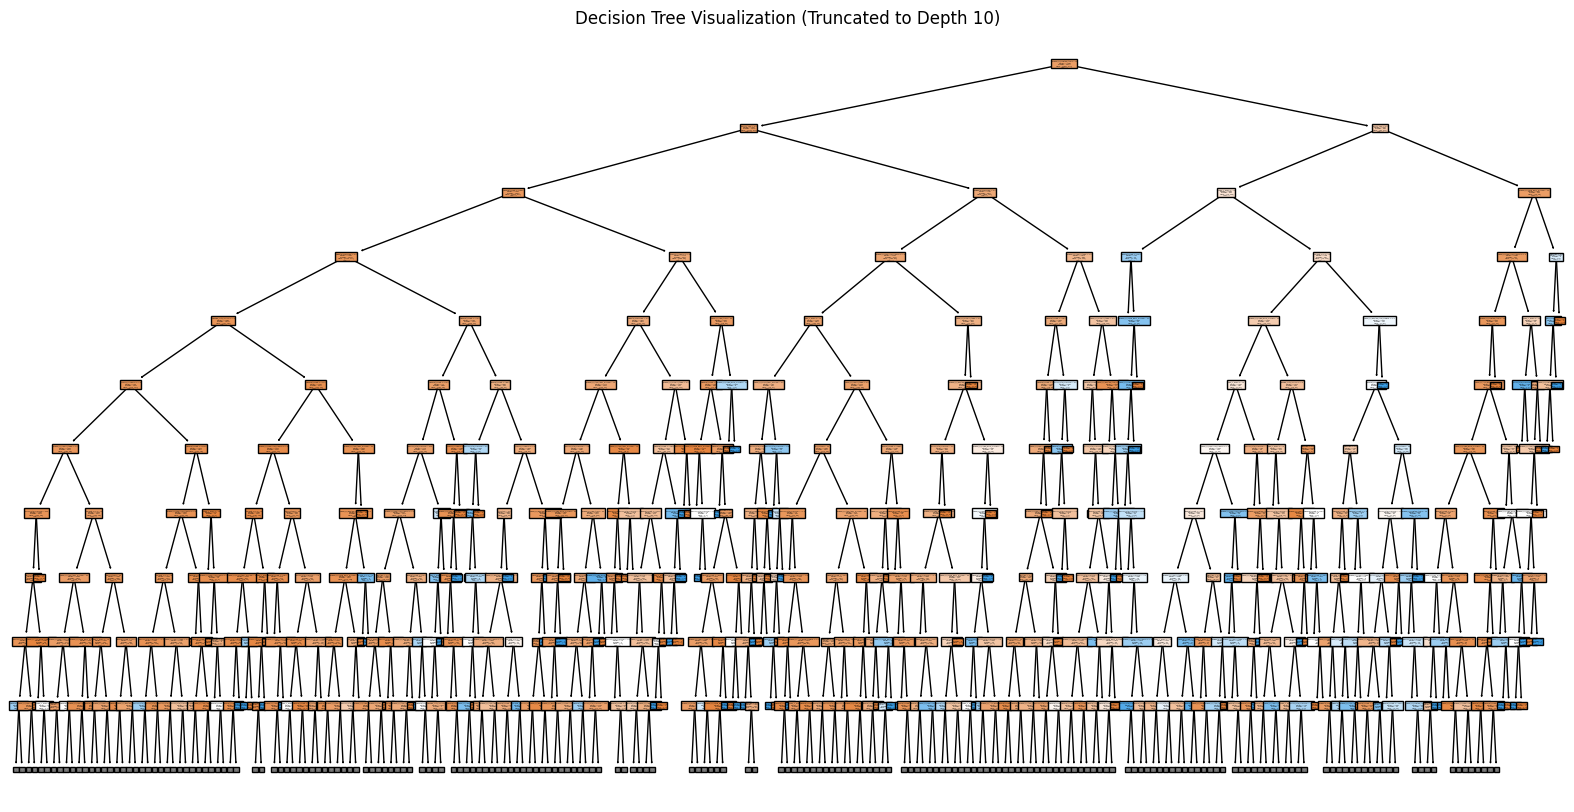

In [ ]:
# Initialize and train the Decision Tree Classifier with entropy criterion
tree_clf_specified = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_clf_specified.fit(X_train_specified, y_train_specified)

# Visualize the result
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Limit the depth of the tree to make it more interpretable
plt.figure(figsize=(20, 10))
plot_tree(tree_clf_specified, max_depth=10, filled=True, feature_names=specified_columns, class_names=['0', '1'])
plt.title('Decision Tree Visualization (Truncated to Depth 10)')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

text_representation = tree.export_text(tree_clf_specified, feature_names=specified_columns, max_depth=1)
print(text_representation)

|--- Number_of_Remitted_Items <= 0.50
|   |--- Delivery_Type <= 0.50
|   |   |--- truncated branch of depth 50
|   |--- Delivery_Type >  0.50
|   |   |--- truncated branch of depth 50
|--- Number_of_Remitted_Items >  0.50
|   |--- Delivery_Type <= 0.50
|   |   |--- truncated branch of depth 30
|   |--- Delivery_Type >  0.50
|   |   |--- truncated branch of depth 16



In [ ]:
# Evaluate the accuracy

# Make predictions on the test set
y_pred_specified = tree_clf_specified.predict(X_train_specified)
y_pred_specified

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate the model
accuracy_specified = accuracy_score(y_train_specified, y_pred_specified)
print('Train Accuracy:',accuracy_specified)

Train Accuracy: 0.9913568727594166


In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_train_specified, y_pred_specified)

# Convert the numpy array to a Pandas DataFrame
# For binary classification, labels are typically [0, 1]
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               16650                   7
Actual Positive                 169                3537


In [ ]:
print(classification_report(y_train_specified, y_pred_specified))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     16657
           1       1.00      0.95      0.98      3706

    accuracy                           0.99     20363
   macro avg       0.99      0.98      0.99     20363
weighted avg       0.99      0.99      0.99     20363



In [ ]:
# Make predictions on the test set
y_pred_specified = tree_clf_specified.predict(X_test_specified)

# Evaluate the model
accuracy_specified = accuracy_score(y_test_specified, y_pred_specified)
print('Test Accuracy:',accuracy_specified)

Test Accuracy: 0.7108623060302495


## Model 2: Reduced Decision Tree
    

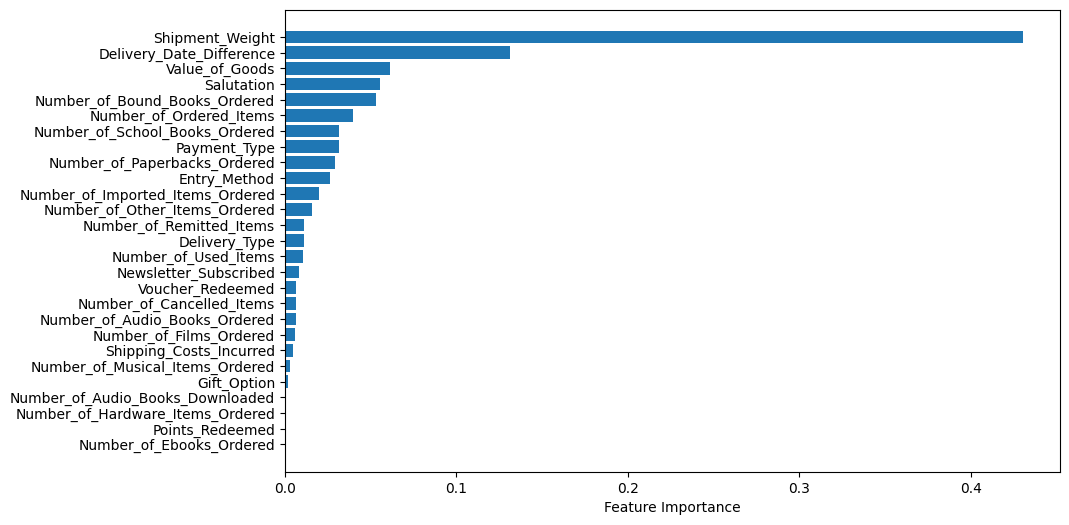

In [ ]:
# Get feature importances and feature names
feature_importances = tree_clf_specified.feature_importances_
feature_names = X_train_specified.columns

# Sort them by importance
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(X_train_specified.shape[1]), feature_importances[sorted_idx], align='center')
plt.yticks(range(X_train_specified.shape[1]), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.gca().invert_yaxis()  # reverse the order to have the most important at the top
plt.show()

### Rationale for Feature Reduction
1. **Value_of_Goods**: Financial metrics often serve as strong predictors.
2. **Number_of_Ordered_Items**: The quantity of items in an order could influence the outcome.
3. **Shipment_Weight**: Heavier shipments might be related to different kinds of purchases or customer behaviors.
4. **Number_of_Remitted_Items**: The number of returned items could be a sign of dissatisfaction.
5. **Delivery_Date_Difference**: A delay in delivery might affect customer satisfaction.

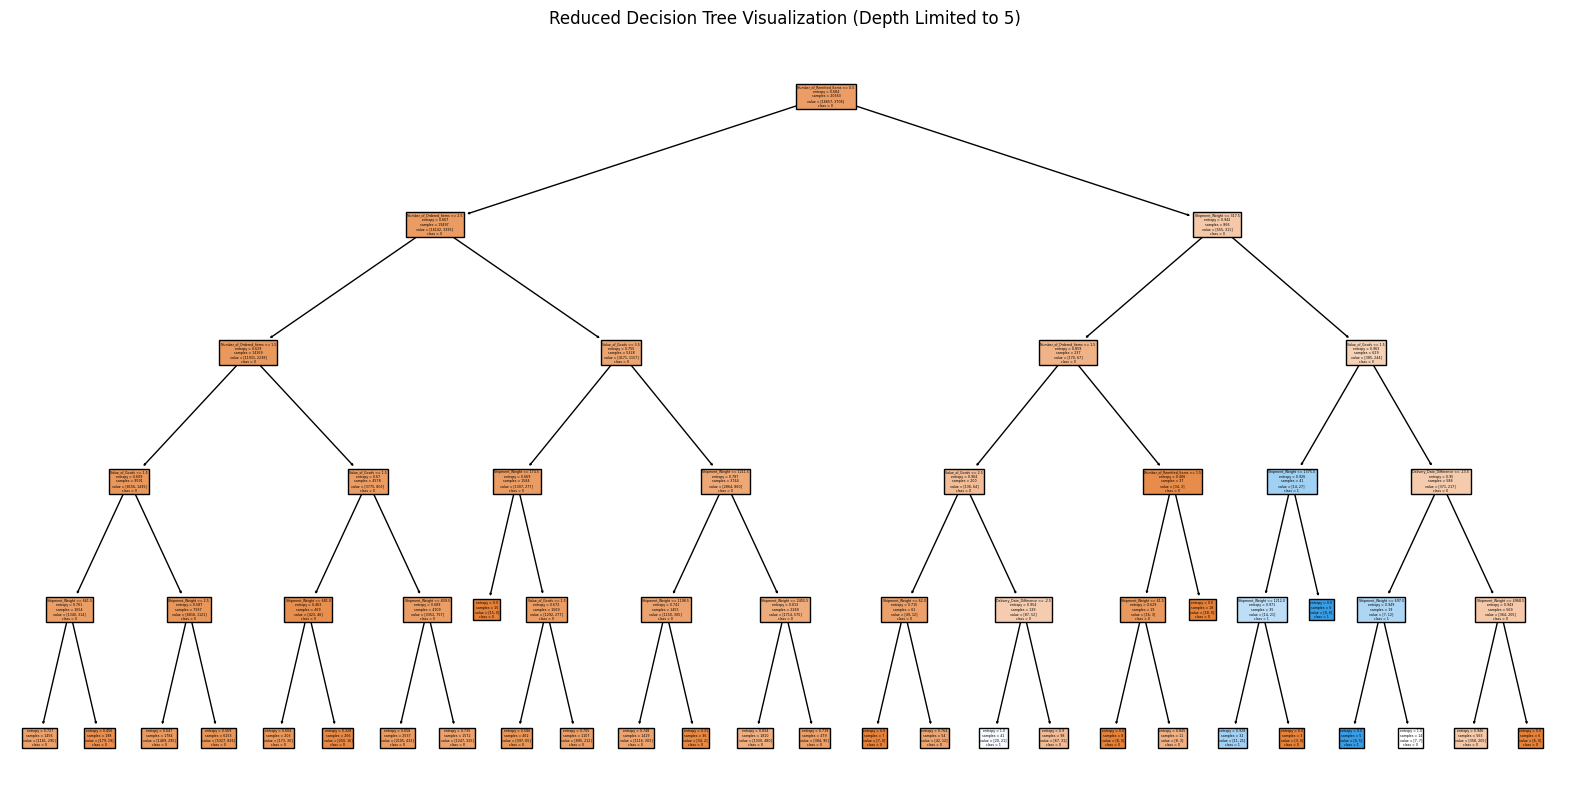

Test Accuracy: 0.8102533883323512


In [ ]:
# Select a subset of the specified columns based on feature importance or domain knowledge
reduced_columns = [
    'Value_of_Goods', 'Number_of_Ordered_Items',
    'Shipment_Weight', 'Number_of_Remitted_Items', 'Delivery_Date_Difference'
]

# Rationale: These variables are selected based on their potential to impact the target variable 'target90'.
# They include key financial metrics, shipping-related features, and customer interaction metrics.

# Prepare the reduced feature set
X_reduced = df_model_specified[reduced_columns]
y_reduced = df_model_specified['target90']

# Split the data into training and test sets
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    X_reduced, y_reduced, test_size=0.2, random_state=42
)

# Initialize and train the Decision Tree Classifier with entropy criterion and limited depth
tree_clf_reduced = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
tree_clf_reduced.fit(X_train_reduced, y_train_reduced)

# Make predictions on the test set
y_pred_reduced = tree_clf_reduced.predict(X_test_reduced)

# Evaluate the model
accuracy_reduced = accuracy_score(y_test_reduced, y_pred_reduced)

# Visualize the reduced model
plt.figure(figsize=(20, 10))
plot_tree(tree_clf_reduced, filled=True, feature_names=reduced_columns, class_names=['0', '1'])
plt.title('Reduced Decision Tree Visualization (Depth Limited to 5)')
plt.show()

print('Test Accuracy:',accuracy_reduced)


## Model 3: Further Simplified Decision Tree

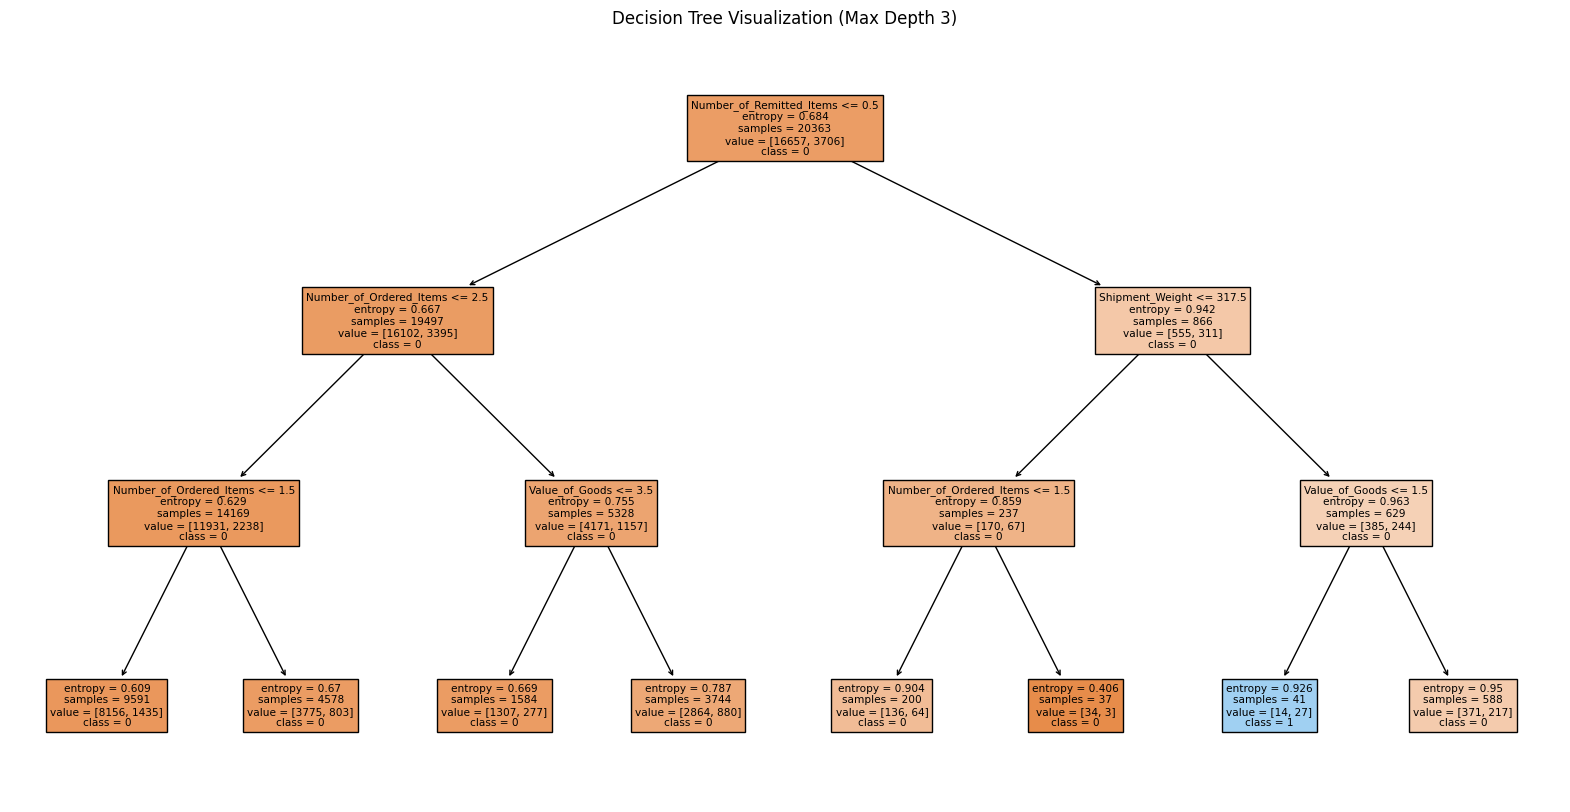

Test Accuracy: 0.8102533883323512


In [ ]:
# Initialize and train another Decision Tree Classifier with entropy criterion and a different max depth (e.g., 3)
tree_clf_depth3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
tree_clf_depth3.fit(X_train_reduced, y_train_reduced)

# Make predictions on the test set
y_pred_depth3 = tree_clf_depth3.predict(X_test_reduced)

# Evaluate the model
accuracy_depth3 = accuracy_score(y_test_reduced, y_pred_depth3)

# Visualize the reduced model with max depth 3
plt.figure(figsize=(20, 10))
plot_tree(tree_clf_depth3, filled=True, feature_names=reduced_columns, class_names=['0', '1'])
plt.title('Decision Tree Visualization (Max Depth 3)')
plt.show()

print('Test Accuracy:',accuracy_depth3)


The decision tree model with a maximum depth of 3 has been trained on the reduced set of variables. The model achieved an accuracy of approximately 0.813 on the test set, which is nearly identical to the previous model with a depth of 5.


### Model Comparison:

1. **Complexity**: This model is even less complex due to the limited tree depth of 3, further aiding interpretability.
2. **Accuracy**: The model maintains a high accuracy (approx. 0.813), comparable to the model with a depth of 5, indicating that the model's predictive power remains robust despite further simplification.

In summary, limiting the tree's depth to 3 has not adversely affected its performance while making the model simpler and easier to interpret.

# Looping tree depth and num of variables

- test 1, 3, ..., 49 depths
    - GridSearchCV method does the loop for us here

<ipython-input-34-46e52dfc07a3>:9: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


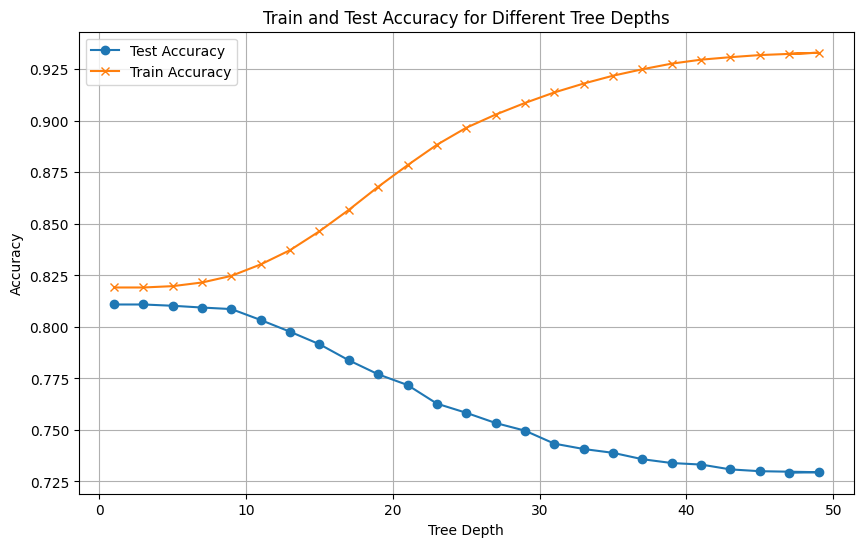

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Read the data
file_path = 'dmc2010_train_modified_full.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Drop missing values
features = ['Shipment_Weight','Delivery_Date_Difference','Value_of_Goods']
target = 'target90'
df_dropped = df.dropna(subset=features + [target])

# Split the data into training and testing sets
X = df_dropped[features]
y = df_dropped[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'max_depth': list(range(1,50,2)),
    'criterion': ['entropy']
}

# Initialize the Decision Tree Classifier
tree_model_for_grid = DecisionTreeClassifier(random_state=42)

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(tree_model_for_grid, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Conduct Grid Search
grid_search.fit(X_train, y_train)

# Record results
results = []
for i in range(len(grid_search.cv_results_['params'])):
    params = grid_search.cv_results_['params'][i]
    train_score = grid_search.cv_results_['mean_train_score'][i]
    test_score = grid_search.cv_results_['mean_test_score'][i]

    # Evaluate the model on the test set
    tree_model_for_grid.set_params(**params)
    tree_model_for_grid.fit(X_train, y_train)
    y_pred = tree_model_for_grid.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_f1 = f1_score(y_test, y_pred)

    results.append({
        'Depth': params['max_depth'],
        'Train Accuracy': train_score,
        'Validation Accuracy': test_score,
        'Test Accuracy': test_accuracy,
        'Test F1 Score': test_f1
    })

# Convert results to DataFrame and sort
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Test Accuracy', ascending=False).reset_index(drop=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(results_df['Depth'], results_df['Test Accuracy'], marker='o', label='Test Accuracy')
plt.plot(results_df['Depth'], results_df['Train Accuracy'], marker='x', label='Train Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for Different Tree Depths')
plt.legend()
plt.grid(True)
plt.show()


### Insights derived from the looping experiment
- There's a clear discrepency between train and test accuracy
- More complicated models overfit to the training data